# Proyek Tugas Akhir: Liver Disease Prediction
- **Mahasiwa 1**:
Aoki Takeshi (33422003)
- **Mahasiwa 2**:
Neli Fauziyah (33422018)
- **Kelas:** IK-2A

## Business Problem

Menurut data WHO yang diterbitkan pada tahun 2017, kematian akibat penyakit hati di India mencapai 259.749 atau 2,95% dari total kematian. Pasien dengan penyakit hati terus meningkat karena konsumsi alkohol yang berlebihan, menghirup gas berbahaya, asupan makanan yang terkontaminasi, acar, dan obat-obatan.

Proyek ini bertujuan untuk mengklasifikasikan data dan memberikan wawasan yang berguna yang dapat membantu para dokter. Dataset yang digunakan untuk klasifikasi diperoleh dari kaggle. Dataset ini berisi data tentang senyawa kimia yang diperoleh dari tes seperti SGOT, SGPT yang menyebutkan apakah pasien perlu didiagnosis atau tidak.

Kolom "Dataset" adalah label kelas yang digunakan untuk membagi kelompok menjadi pasien hati (penyakit hati) atau tidak (tidak ada penyakit). Kumpulan data ini berisi 441 catatan pasien pria dan 142 catatan pasien wanita.

Setiap pasien yang usianya melebihi 89 tahun didaftarkan sebagai pasien dengan usia "90 tahun".

## Import Library

In [1]:
# untuk komputasi numerik
import numpy as np

# untuk dataframes
import pandas as pd

# untuk visualisasi yang lebih mudah
import seaborn as sns

# untuk visualisasi dan menampilkan plot
from matplotlib import pyplot as plt

# import peta warna
from matplotlib.colors import ListedColormap

# Mengabaikan Peringatan
import warnings
warnings.filterwarnings("ignore")

# untuk membagi set data latih dan uji
from sklearn.model_selection import train_test_split

# untuk melakukan penyetelan hiperparameter
from sklearn.model_selection import RandomizedSearchCV

# Model Pembelajaran Mesin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix


## Data Wragling

### Gathering Data

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.shape

(583, 11)

In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  13


In [9]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Data Cleaning

In [10]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


In [11]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
df.loc[df['Albumin_and_Globulin_Ratio'].isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [13]:
df.dropna(subset=['Albumin_and_Globulin_Ratio'], inplace=True)

In [14]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Exploratory Data Analysis

In [15]:
df.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
473,42,Male,1.0,0.3,154,38,21,6.8,3.9,1.30,2
380,50,Male,1.7,0.8,331,36,53,7.3,3.4,0.90,1
491,27,Male,1.0,0.3,180,56,111,6.8,3.9,1.85,2
271,4,Male,0.8,0.2,460,152,231,6.5,3.2,0.90,2
558,51,Male,4.0,2.5,275,382,330,7.5,4.0,1.10,1


In [16]:
df.describe(include="all")

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.886926,NaN,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,1.286219
std,16.274893,NaN,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000


In [17]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

Dari hasil di atas, "Gender" memiliki type object sehingga akan sulit untuk membedakan kategori dalam gender. Oleh karena itu, type gender perlu diubah ke type numerik.

## Distribution of Numerical Features

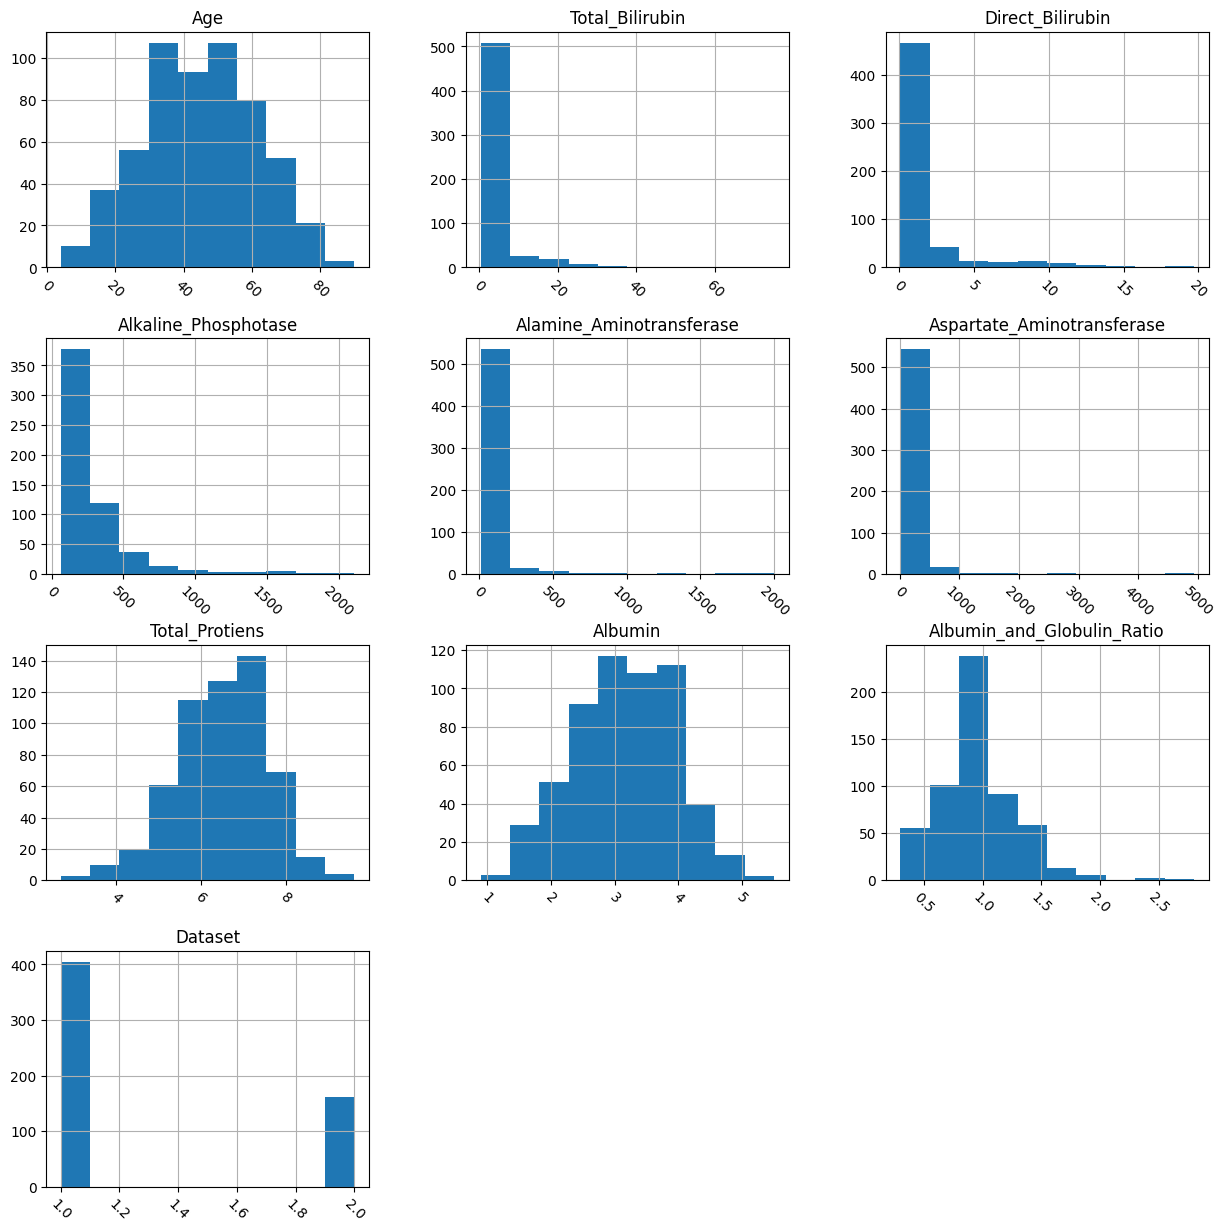

In [18]:
# Plot grid histogram
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Menampilkan label yang diputar sebesar 45 derajat

# Membersihkan "residu" teks
plt.show()

In [19]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,1.286219
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Tampaknya ada data outlier di kolo Aspartate_Aminotransferase karena nilai maksimumnya sangat tinggi dari nilai rata-rata.

Output kolom Dataset memiliki '1' untuk penyakit hati dan '2' untuk tidak ada penyakit hati, jadi mari kita buat 0 untuk tidak ada penyakit untuk membuatnya nyaman.

In [20]:
## Jika skor==negatif, tandai 0; jika tidak, 1
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [21]:
df.describe(include=['object'])

,Gender
count,566
unique,2
top,Male
freq,428


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

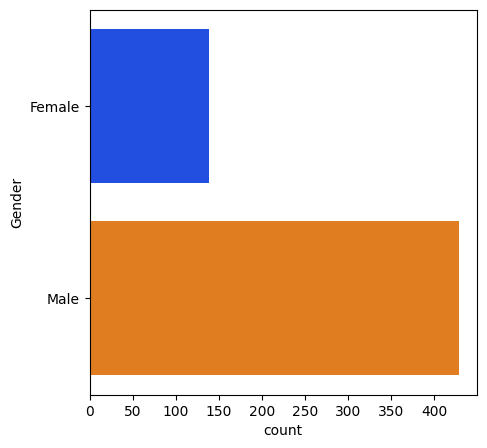

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', palette='bright', data=df)

In [23]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


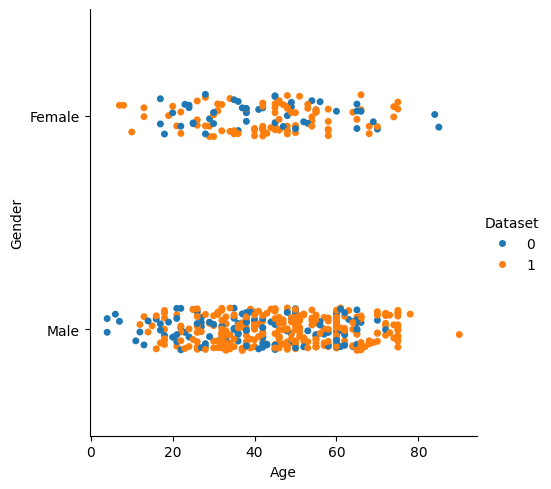

In [24]:
sns.catplot (x="Age", y="Gender", hue="Dataset", data=df);

Usia menjadi faktor penyakit hati untuk jenis kelamin pria dan wanita.

Banyaknya pasien pria:  428
Banyaknya pasien wanita:  138


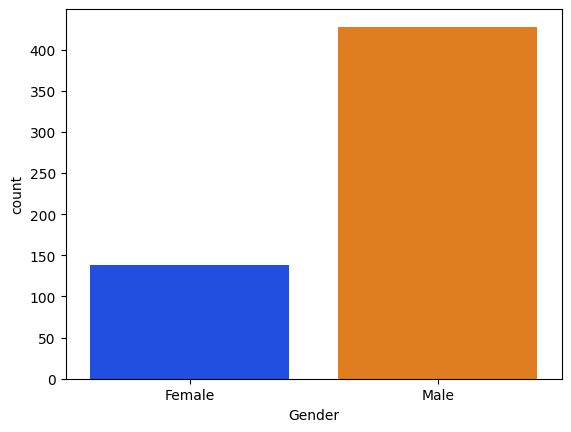

In [25]:
sns.countplot(data=df, x = 'Gender', label='Count', palette='bright')

M, F = df['Gender'].value_counts()
print('Banyaknya pasien pria: ',M)
print('Banyaknya pasien wanita: ',F)

Mari kita buat agar Male menjadi angka 0, dan Female menjadi angka 1

In [26]:
## Jika skor==negatif, tandai 0; jika tidak, 1
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

### 2-D Scatter Plot

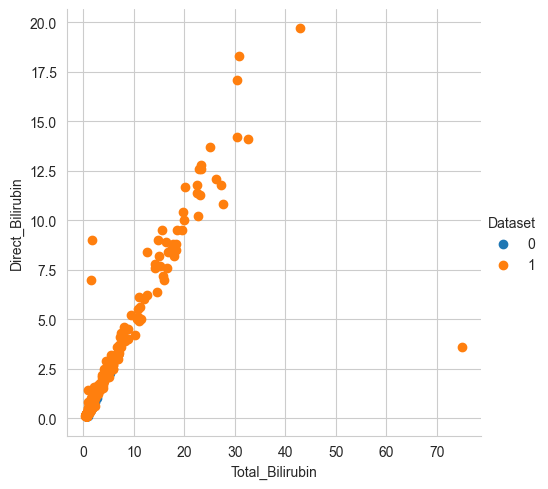

In [27]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

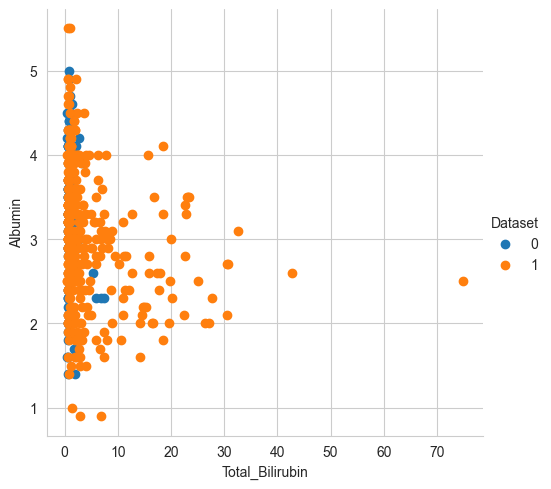

In [28]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

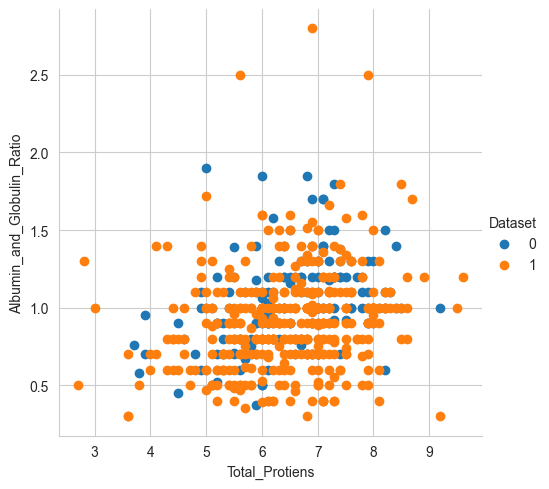

In [29]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

## Correlations

Mari kita lihat hubungan antara numeric features dan numeric features lainnya.

Korelasi adalah nilai antara -1 dan 1 yang menunjukkan seberapa dekat nilai untuk dua features yang berbeda bergerak bersamaan. Korelasi positif berarti bahwa ketika satu features meningkat, features lainnya juga meningkat; misalnya, usia anak dan tinggi badannya. Korelasi negatif berarti bahwa ketika satu features meningkat, features lainnya menurun.

Korelasi yang mendekati -1 atau 1 menunjukkan hubungan yang kuat.
Korelasi yang mendekati 0 menunjukkan hubungan yang lemah.

In [30]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,0.133821
Gender,-0.057542,1.000000,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,-0.077396
Total_Bilirubin,0.010704,-0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,0.224467
Direct_Bilirubin,0.006268,-0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,0.250926
Alkaline_Phosphotase,0.080085,0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.186057
Alamine_Aminotransferase,-0.084319,-0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,0.161617
Aspartate_Aminotransferase,-0.017352,-0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,0.151009
Total_Protiens,-0.195893,0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,-0.036443
Albumin,-0.269448,0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,-0.165273
Albumin_and_Globulin_Ratio,-0.215967,0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,-0.171402


<Axes: >

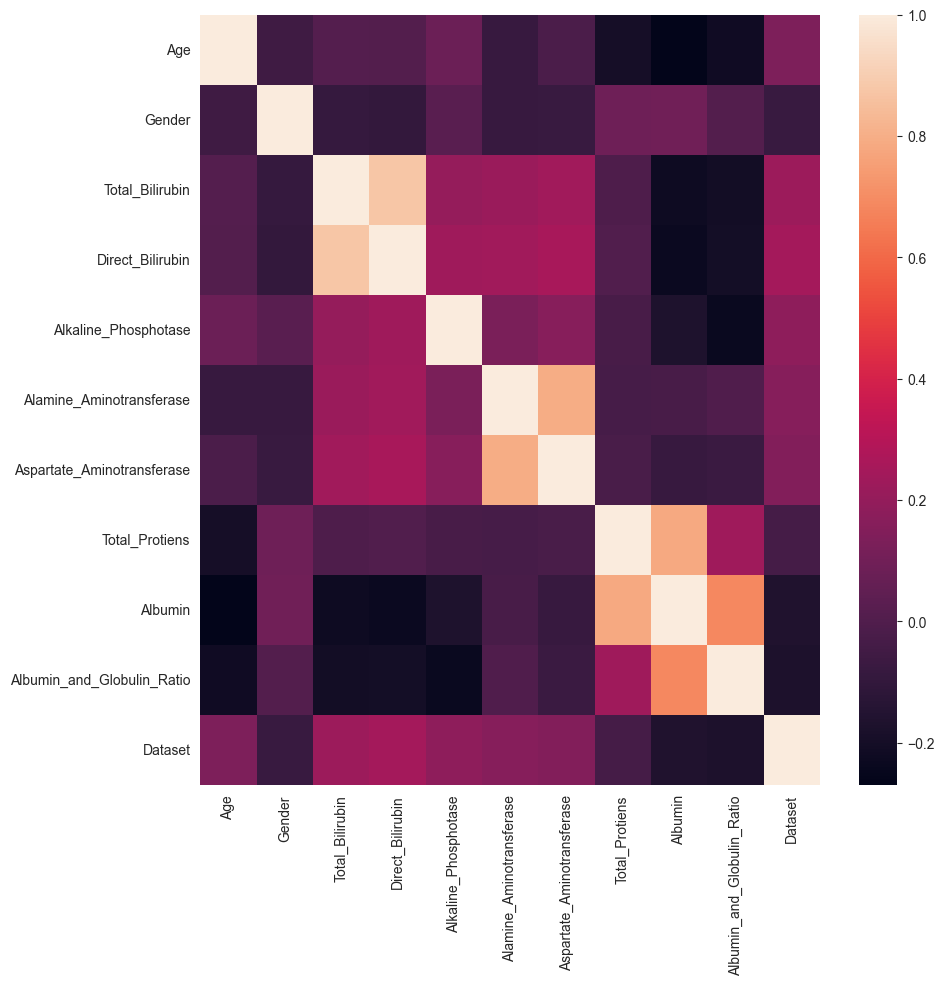

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

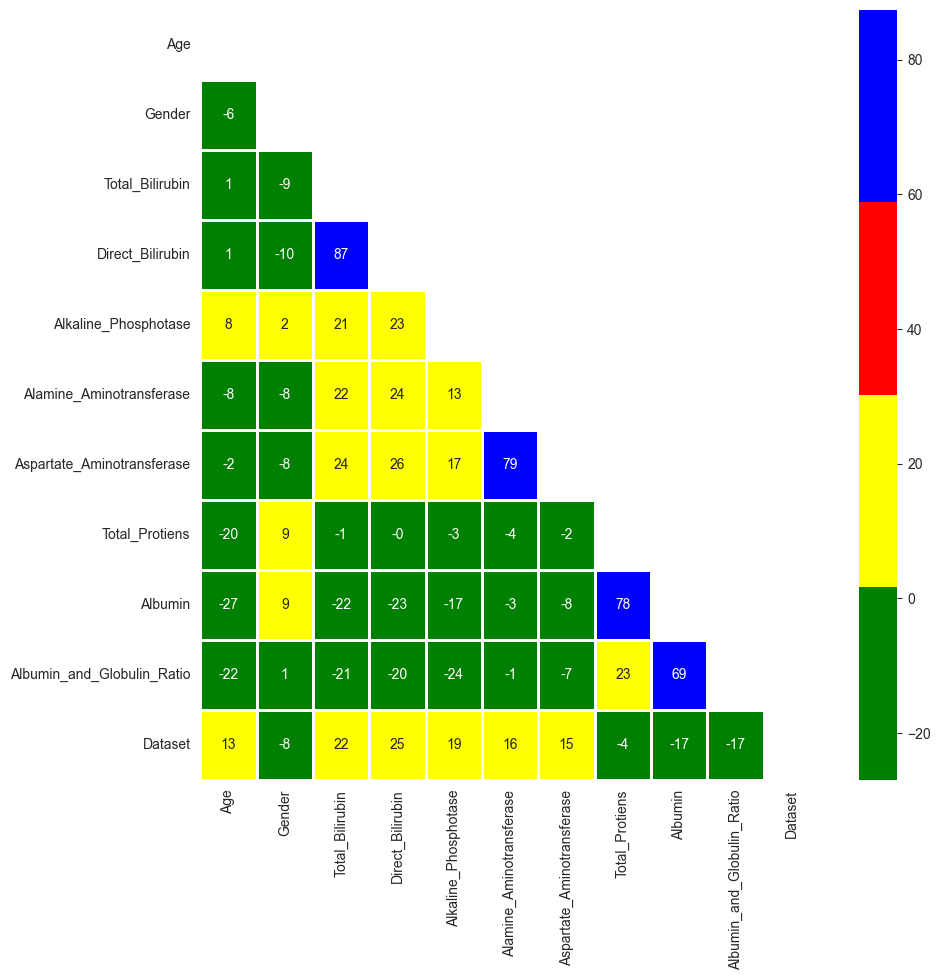

In [32]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

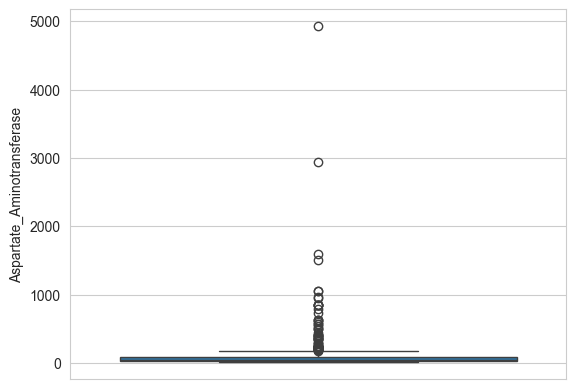

In [33]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [34]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [35]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(565, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

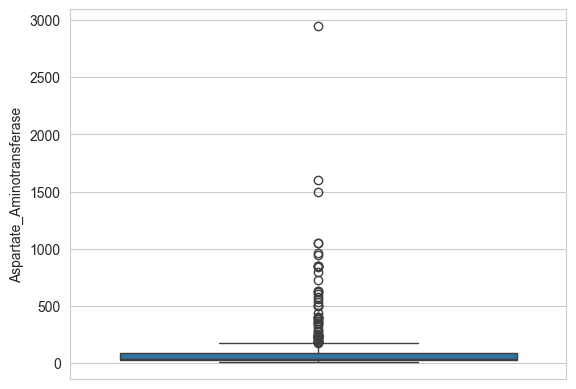

In [36]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [37]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [38]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(564, 11)

In [39]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [40]:
# Membuat objek terpisah untuk variabel target
y = df.Dataset

# Membuat objek terpisah untuk fitur input
X = df.drop('Dataset', axis=1)

In [41]:
# Membagi X dan y ke dalam set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1234,
                                                    stratify=df.Dataset)

In [42]:
# Mencetak jumlah pengamatan di X_train, X_test, y_train, dan y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


#### Data standardization

Dalam Standardisasi Data, kami melakukan pemusatan rata-rata nol dan penskalaan unit dimana kami membuat rata-rata semua fitur sebagai nol dan standar deviasi sebagai 1.

Dengan demikian kita menggunakan mean dan standar deviasi dari setiap fitur.

Sangat penting untuk menyimpan mean dan standar deviasi untuk setiap fitur dari training set, karena kita menggunakan mean dan standar deviasi yang sama di test set.

In [43]:
train_mean = X_train.mean()
train_std = X_train.std()

In [44]:
## Menstandarkan kumpulan train data set
X_train = (X_train - train_mean) / train_std

In [45]:
## Memeriksa mean dan standar deviasi
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.378547e-16,-8.271285e-17,-3.938707e-18,1.772418e-17,6.301931e-17,-7.877414e-18,-2.363224e-17,1.486862e-15,1.417935e-16,-3.150966e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.459710e+00,-5.980292e-01,-4.613674e-01,-5.013974e-01,-9.009611e-01,-3.943772e-01,-4.865614e-01,-3.476087e+00,-2.818030e+00,-2.023543e+00
25%,-7.595886e-01,-5.980292e-01,-3.996190e-01,-4.658144e-01,-4.636908e-01,-3.157860e-01,-4.017376e-01,-6.503894e-01,-7.121980e-01,-6.338007e-01
50%,2.975347e-02,-5.980292e-01,-3.687448e-01,-4.302314e-01,-3.270438e-01,-2.432402e-01,-3.056039e-01,7.882282e-02,3.103678e-02,1.145223e-01
75%,7.583769e-01,1.668451e+00,-1.063141e-01,-7.440091e-02,2.042996e-02,-9.814860e-02,-7.092474e-02,6.257320e-01,8.362078e-01,4.199603e-01
max,2.762091e+00,1.668451e+00,1.105471e+01,6.472879e+00,7.090935e+00,9.701578e+00,8.504762e+00,2.813368e+00,2.880103e+00,5.612406e+00


In [46]:
## Catatan: Kami menggunakan train_mean dan train_std_dev untuk menstandardisasi set data uji
X_test = (X_test - train_mean) / train_std

In [47]:
## Periksa mean dan std dev. - tidak tepat 0 dan 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.109816,-0.216940,-0.062052,-0.033465,-0.048222,-0.017203,0.007819,-0.082507,-0.175052,-0.218486
std,0.937258,0.851421,0.835512,1.046110,0.734043,0.661163,0.874507,0.962887,0.922474,0.851370
min,-2.338273,-0.598029,-0.445930,-0.501397,-0.768218,-0.394377,-0.469597,-2.655723,-2.198667,-1.718105
25%,-0.577433,-0.598029,-0.399619,-0.465814,-0.444170,-0.321831,-0.401738,-0.741541,-0.836070,-0.801792
50%,0.090472,-0.598029,-0.384182,-0.430231,-0.342661,-0.261377,-0.316914,-0.012329,-0.216708,-0.190916
75%,0.940533,-0.598029,-0.198937,-0.181150,-0.018612,-0.007466,-0.034168,0.625732,0.526527,0.114522
max,1.851312,1.668451,4.231512,5.974717,3.147694,4.834965,4.263572,2.175308,2.136869,2.558026


### Model Random Forest

In [48]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [49]:
model.best_estimator_

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [50]:
y_train_pred = model.predict(X_train)

In [51]:
y_pred = model.predict(X_test)

In [52]:
# Dapatkan hanya prediksi untuk kelas positif (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [53]:
# Menampilkan 10 prediksi pertama
y_pred_proba[:10]

array([0.60327024, 0.60865726, 0.61855324, 0.56209361, 0.33015668,
       0.98679225, 0.47364447, 0.55923711, 0.94609721, 0.36792676])

In [54]:
confusion_matrix(y_test, y_pred).T

array([[ 6, 10],
       [26, 71]], dtype=int64)

In [55]:
# Hitung kurva ROC dari y_test dan pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

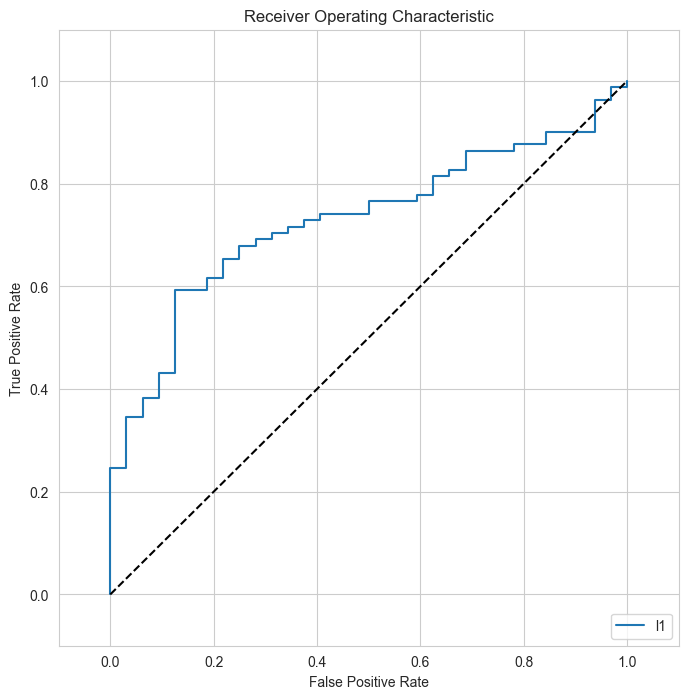

In [56]:
# Ploting kurva ROC
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot kurva ROC
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Garis diagonal 45 derajat
plt.plot([0,1],[0,1],'k--')

# Batas dan label sumbu
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
# Hitung AUC untuk set Train
roc_auc_score(y_train, y_train_pred)

0.929211598370477

In [58]:
# Hitung AUC untuk set Uji
print(auc(fpr, tpr))

0.7287808641975309


#### Feature Importance

In [59]:
## Membangun model lagi dengan hiperparameter terbaik
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [60]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Aspartate_Aminotransferase
Total_Bilirubin
Alamine_Aminotransferase
Age
Direct_Bilirubin
Albumin
Albumin_and_Globulin_Ratio
Total_Protiens
Gender
